In [67]:
!pip install openpyxl matplotlib

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
np.random.seed(1)
n = 100
dates = pd.date_range(start='2050-01-01', periods=n, freq='D')
products = np.random.choice(['Tablet', 'Camers', 'Phone', 'Laptop'], n)
prices = np.round(np.random.uniform(50.0, 200.0, n), 2)
quantities = np.random.randint(1, 15, n)

data = {
    'Date': dates,
    'Product': products,
    'Price': prices,
    'Quantity': quantities
}
df = pd.DataFrame(data)
df.head()

,Date,Product,Price,Quantity
0,2050-01-01,Camers,52.91,9
1,2050-01-02,Laptop,151.83,2
2,2050-01-03,Tablet,81.74,11
3,2050-01-04,Tablet,89.83,5
4,2050-01-05,Laptop,123.74,13


In [54]:
df.dtypes

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int32
dtype: object

In [55]:
df.to_csv('random_sales.csv', index=False)

In [56]:
df = pd.read_csv('random_sales.csv', parse_dates=['Date'], date_format='%Y-%m-%d')
df

,Date,Product,Price,Quantity
0,2050-01-01,Camers,52.91,9
1,2050-01-02,Laptop,151.83,2
2,2050-01-03,Tablet,81.74,11
3,2050-01-04,Tablet,89.83,5
4,2050-01-05,Laptop,123.74,13
...,...,...,...,...
95,2050-04-06,Phone,66.12,12
96,2050-04-07,Laptop,83.86,7
97,2050-04-08,Camers,156.95,13
98,2050-04-09,Tablet,133.96,13


In [57]:
df.dtypes

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int64
dtype: object

In [58]:
df.to_excel('sales_data.xlsx')

In [59]:
df.to_json('sales_data.json')

In [60]:
df.shape

(100, 4)

In [61]:
df.describe().round(2)

,Date,Price,Quantity
count,100,100.00,100.00
mean,2050-02-19 12:00:00,123.20,7.24
min,2050-01-01 00:00:00,50.43,1.00
25%,2050-01-25 18:00:00,75.59,4.00
50%,2050-02-19 12:00:00,131.87,7.00
75%,2050-03-16 06:00:00,162.21,11.00
max,2050-04-10 00:00:00,199.60,14.00
std,NaN,46.45,3.92


In [62]:
df.values[:5]

array([[Timestamp('2050-01-01 00:00:00'), 'Camers', 52.91, 9],
       [Timestamp('2050-01-02 00:00:00'), 'Laptop', 151.83, 2],
       [Timestamp('2050-01-03 00:00:00'), 'Tablet', 81.74, 11],
       [Timestamp('2050-01-04 00:00:00'), 'Tablet', 89.83, 5],
       [Timestamp('2050-01-05 00:00:00'), 'Laptop', 123.74, 13]],
      dtype=object)

In [69]:
product_sales = df.groupby('Product')['Quantity'].sum()
product_sales

Product
Camers    218
Laptop    169
Phone     117
Tablet    220
Name: Quantity, dtype: int64

In [75]:
average_prices = df.groupby('Product')['Price'].mean().round(2)
average_prices

Product
Camers    109.57
Laptop    120.07
Phone     139.54
Tablet    129.60
Name: Price, dtype: float64

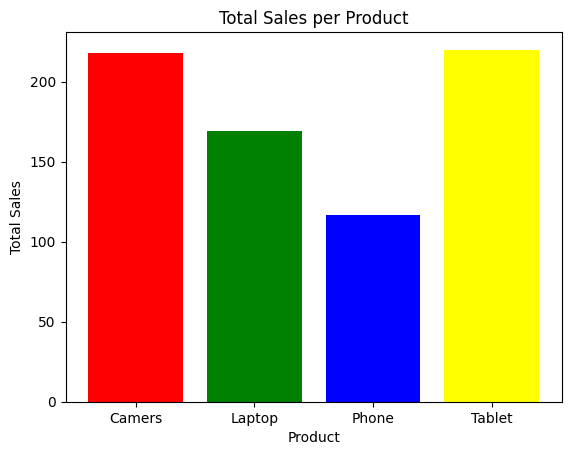

In [74]:
plt.bar(product_sales.index, product_sales.values, color=['red', 'green', 'blue', 'yellow'])
plt.title('Total Sales per Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

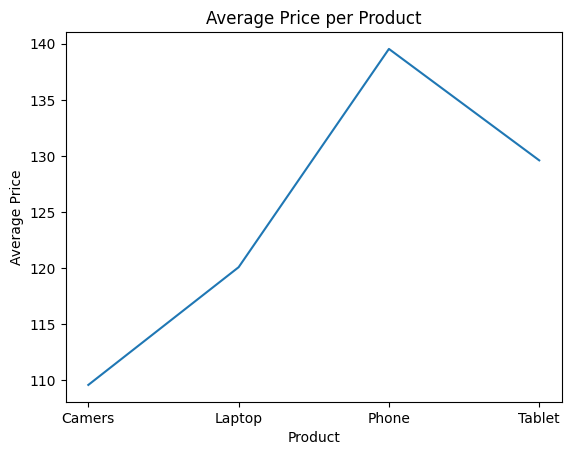

In [79]:
plt.plot(average_prices.index, average_prices.values)
plt.title('Average Price per Product')
plt.xlabel('Product')
plt.ylabel('Average Price')
plt.show()